In [ ]:
from keras.datasets import fashion_mnist
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', save_freq=1)


## Fashion MNIST dataset

This dataset contains 70,000 grayscale images in 10 categories.

The images show individual articles of clothing at low resolution (28 by 28 pixels),

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# initialize model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu')) 
model.add(Dense(10,activation='softmax')) 
model.summary()


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

no_epochs = 16

model.fit(X_train,y_train, batch_size=32, epochs=no_epochs, verbose=False, validation_split=0.25, callbacks=[es])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


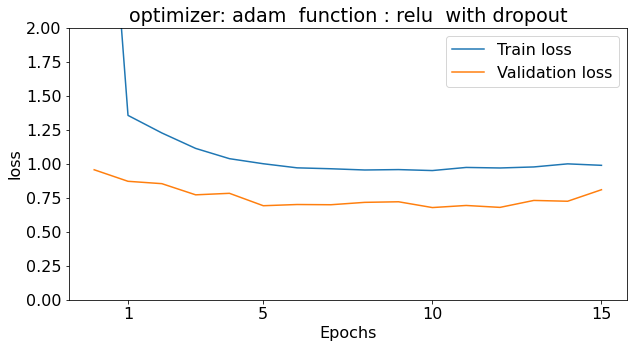

In [ ]:
history = model.history
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
x_ticks = np.arange(0, no_epochs + 1, 5)
x_ticks [0] += 1
plt.xticks(x_ticks)
plt.ylim((0, 2))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("optimizer: adam  function : relu  with dropout")
plt.legend()
plt.show()

In [ ]:
pos = np.argmin(history.history['val_loss'])
model.save("model_{}.hd5".format(pos))
print("The epoch with the minimum validation loss is:", pos+1)
print("The Train Accuracy is: {0:.5f}".format(history.history['accuracy'][pos]))
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_accuracy'][pos]))

INFO:tensorflow:Assets written to: model_10.hd5/assets
The epoch with the minimum validation loss is: 11
The Train Accuracy is: 0.70833
The Validation Accuracy is: 0.75453


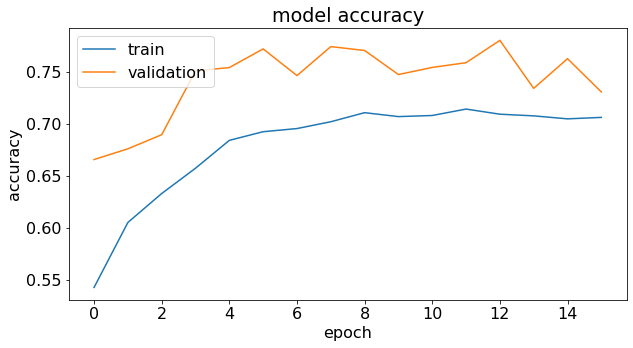

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

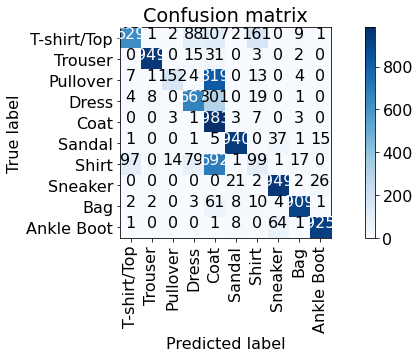

In [ ]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])


**without drop out**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
'''set_random_seed(432)
np.random.seed(234)'''
# initialize model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(128, activation='relu')) 
model.add(Dense(10,activation='softmax')) 
model.summary()


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

no_epochs = 16

history = model.fit(X_train,y_train, batch_size=32, epochs=no_epochs, verbose=False, validation_split=0.2, callbacks=[es])



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 00014: early stopping


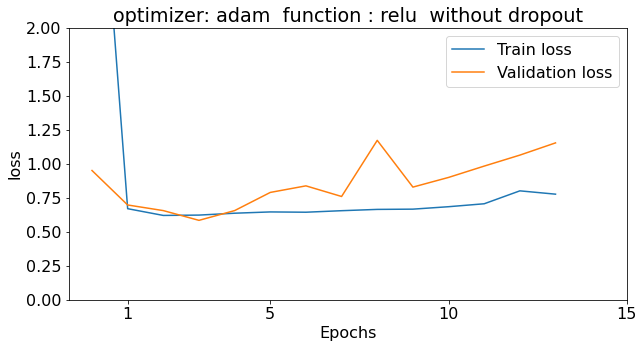

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
x_ticks = np.arange(0, no_epochs + 1, 5)
x_ticks [0] += 1
plt.xticks(x_ticks)
plt.ylim((0, 2))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("optimizer: adam  function : relu  without dropout")
plt.legend()
plt.show()

In [ ]:
pos = np.argmin(history.history['val_loss'])
print("The epoch with the minimum validation loss is:", pos+1)
print("The Train Accuracy is: {0:.5f}".format(history.history['accuracy'][pos]))
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_accuracy'][pos]))

The epoch with the minimum validation loss is: 4
The Train Accuracy is: 0.81988
The Validation Accuracy is: 0.83333


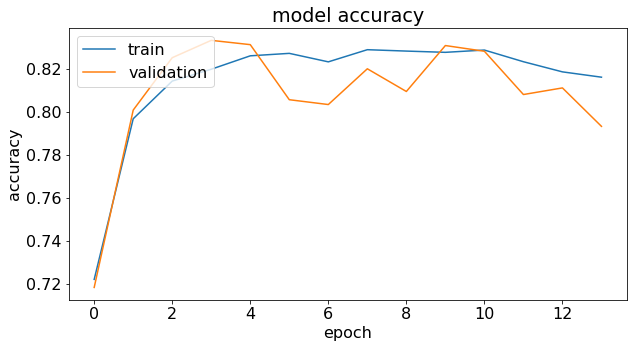

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

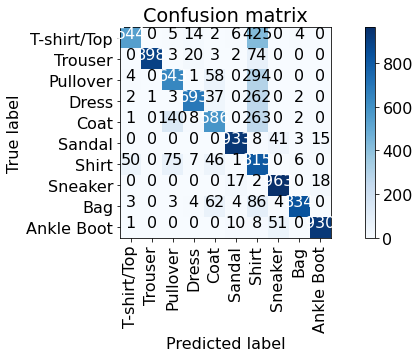

In [ ]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])


**Sigmoid :**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# initialize model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(10,activation='softmax')) 
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

no_epochs = 20

model.fit(X_train,y_train, batch_size=32, epochs=no_epochs, verbose=False, validation_split=0.25, callbacks=[es])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
________________________________________________

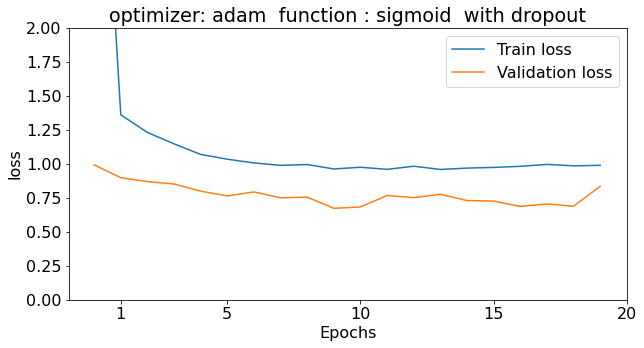

In [ ]:
history = model.history
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
x_ticks = np.arange(0, no_epochs + 1, 5)
x_ticks [0] += 1
plt.xticks(x_ticks)
plt.ylim((0, 2))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("optimizer: adam  function : sigmoid  with dropout")
plt.legend()
plt.show()

In [ ]:
pos = np.argmin(history.history['val_loss'])
model.save("model_{}.hd5".format(pos))
print("The epoch with the minimum validation loss is:", pos)
print("The Train Accuracy is: {0:.5f}".format(history.history['accuracy'][pos]))
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_accuracy'][pos]))

INFO:tensorflow:Assets written to: model_9.hd5/assets
The epoch with the minimum validation loss is: 9
The Train Accuracy is: 0.70651
The Validation Accuracy is: 0.78493


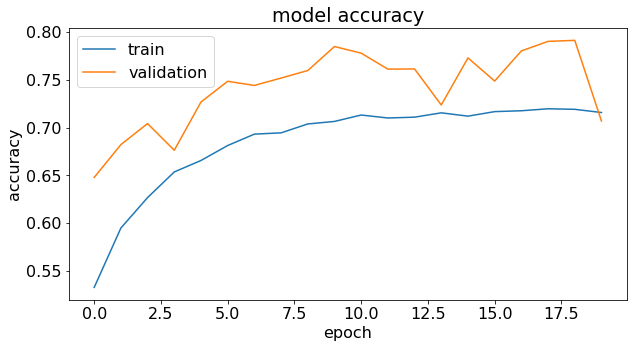

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

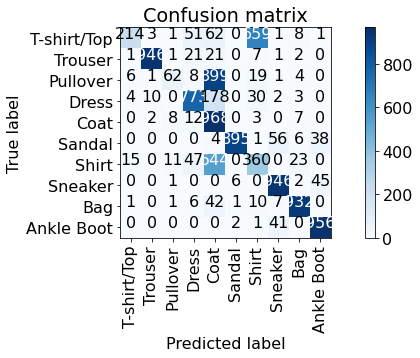

In [ ]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])


**without dropout :**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:

'''set_random_seed(432)
np.random.seed(234)'''
# initialize model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
#model.add(Dropout(0.2))
model.add(Dense(256, activation='sigmoid'))
#model.add(Dropout(0.4))
model.add(Dense(128, activation='sigmoid')) 
model.add(Dense(10,activation='softmax')) 
model.summary()


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

no_epochs = 32

model.fit(X_train,y_train, batch_size=32, epochs=no_epochs, verbose=False, validation_split=0.25, callbacks=[es])


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


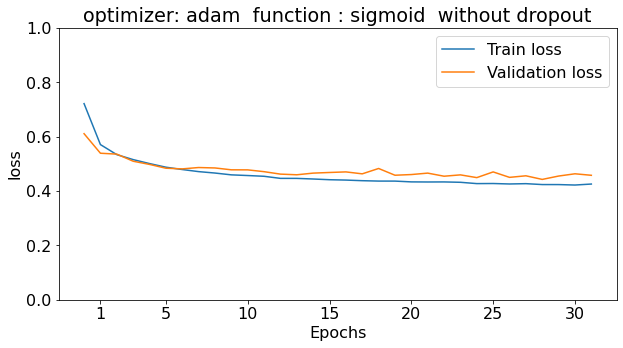

In [ ]:
history = model.history
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
x_ticks = np.arange(0, no_epochs + 1, 5)
x_ticks [0] += 1
plt.xticks(x_ticks)
plt.ylim((0, 1))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("optimizer: adam  function : sigmoid  without dropout")
plt.legend()
plt.show()

In [ ]:
pos = np.argmin(history.history['val_loss'])
model.save("model_{}.hd5".format(pos))
print("The epoch with the minimum validation loss is:", pos)
print("The Train Accuracy is: {0:.5f}".format(history.history['accuracy'][pos]))
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_accuracy'][pos]))

INFO:tensorflow:Assets written to: model_28.hd5/assets
The epoch with the minimum validation loss is: 28
The Train Accuracy is: 0.85031
The Validation Accuracy is: 0.84420


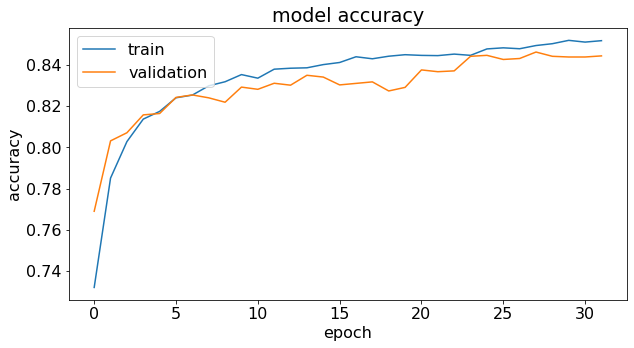

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

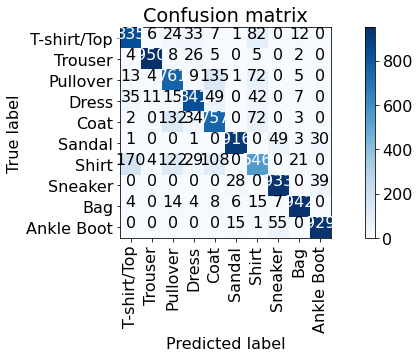

In [ ]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])
